# Computer Vision (Machine Learning w/o CNNs)
Image processing is an extremely powerful tool for biomedical engineering. Did you know that in DNA sequencing image processing is used to make judgment calls for each individual base pair being A, T, C, or G? Image processing is also used in a variety of biomedical applications, like diagnosing cancerous tumors in images of tissue, image-guided surgery, and in numerous and disparate research applications.

In this module, we will explore a very simple image processing task: how to differentiate between handwritten 0's and 1's. While on the surface this task seems unrelated to biomedical engineering, a simple leap of imagination reveals that this kind of image processing could be used to differentiate (and thus diagnose) between bacilli and cocci. In other words, by learning how to process images of 0's and 1's, you are also learning how to develop a streptococci test!

## 1. File Input, Loading Images, & Matplotlib
### Image Data and Format
The first thing we need to do in order to begin analyzing handwritten 0's and 1's, is to use Python to load a bunch of sample images of handwritten 0's and 1's. In the following code, we will be importing the two following files:
* `zeros.txt` contains 1000 images of 28 pixel x 28 pixel binary images of handwritten 0's
* `ones.txt`
contains 1000 images of 28 pixel x 28 pixel binary images of handwritten 1's

A **binary image** is an image that only has two possible values for each pixel, in this case 0 or 1. For this module, a pixel with value 0 will be white and a pixel with value 1 will be black (this is not always the case for image processing in general).

If you open the two text files, you will see that each file contains 1000 rows of 784 (28x28) 0 and 1's separated by spaces. Each of these rows corresponds to one 28x28 handwritten binary image. When we load the rows of 0 and 1's from these text files, we will need to "reshape" each row from a 1-dimentional 1x784 vector to a 28x28 sized 2-dimensional image. This is what the `reshape(1000, 28, 28)` function does in the code below.

After we have reshaped each image, we will be left with a final 1000x28x28 matrix of 0's and another 1000x28x28 matrix of 1's. This means that when we want to select the i'th image of the 0's, we can do so with the Python statement `zero[i-1, :, :]`. The `i-1` denotes the i'th image (because remember Python is 0-indexed!), and the colons denote that we want all 28 rows and 28 columns of the i'th image.

### Matplotlib and Numpy
At the beginning of the code, you will see that we will be importing a couple of libraries to use in this module:
* `matplotlib` is a powerful Python plotting library that emulates plotting in MATLAB. This package will allow us to "plot" or show the imges of handwritten 0's and 1's. 
* `numpy` is a powerful Python library that allows us to use powerful functions with arrays and matrices




In [1]:
import numpy as np # import numpy
import matplotlib
import matplotlib.pyplot as plt # import the plotting functionality of matplotlib
%matplotlib inline 

fname0 = 'zeros.txt' 
fname1 = 'ones.txt'
zeros = np.fromfile(fname0, sep = ' ').reshape(1000, 28, 28) 
ones = np.fromfile(fname1, sep=' ').reshape(1000, 28, 28)

### Viewing Images and Subplots
Now that we have loaded the image data into our matrix variables `zeros` and `ones`, let's see what a few of the handwritten images look like!

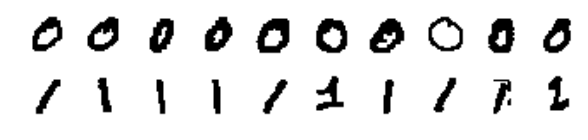

In [2]:
sample = 10 # how many sample images we want to see
plt.figure(figsize=(sample, 2)) # determines how big the images will be
for i in range(sample):
    plt.subplot(2, sample, i+1) # plots the next plot at location i+1 
    plt.imshow(zeros[i, :, :], cmap = matplotlib.cm.Greys), plt.axis('off')
    plt.subplot(2, sample, sample+i+1) # plots the next plot at location sample+i+1
    plt.imshow(ones[i, :, :], cmap = matplotlib.cm.Greys), plt.axis('off')

## 2. Initial Image Processing & Analysis
### Aggregate Image
Now that we have seen what a select few of the handwritten images look like, let's try to get a better understanding of what the data look like as a whole. To do this, we can simply sum all 1000 of the binary images together for each of 0 and 1. This in effect overlaying all 1000 images on top of each other and seeing what the aggregate image looks like. Remember that for each individual image, each pixel value can only be 0 or 1; however, if we sum all 1000 images together, each pixel value will range from 0 (if none of the 1000 images were black at that pixel) to 1000 (if all of the 1000 images were black at that pixel). This way, we can get an idea of which pixel locations in the 28x28 image are "popular" for the 0's and which ones are popular for the 1's. We will use the function `np.sum()`, which takes a matrix, and sums all the matrix entries along one of the dimensions (also known as axes). Since we have a 1000x28x28 matrix, and we want to sum all the 1000 images, we want to sum along the 1st axis (but remember that Python is 0-indexed, so this is really the 0th axis!). The code for this and the resulting "heatmap" images are shown below.

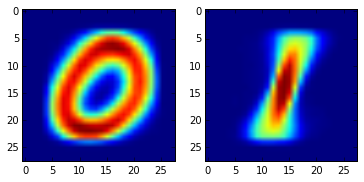

In [3]:
plt.set_cmap(matplotlib.cm.jet)
plt.subplot(1, 2, 1)
allzeros = np.sum(zeros, axis=0)
plt.imshow(allzeros)
plt.subplot(1, 2, 2)
allones = np.sum(ones, axis=0)
plt.imshow(allones);

### Discrimination Features
In order to perform the task of discriminating between a 0 and a 1, we need to figure out what makes an image of a 0 different than that of a 1. What differences do you notice between the aggregate 0 and the aggregate 1? Here are some that I noticed:
1. The 0's have many more pixels on average than the 1's (this is because a 0 is like the circumference of a circle, whereas a 1 is like the diameter of a circle, and we know that $circumference = \pi * diameter$
2. The middle of the 28x28 image is mostly empty for the 0's but filled for the 1's
3. The 0's are much "fatter" or wider in the middle around pixel row 15 than the 1's
4. The 0's have 90 degree rotational symmetry (if you rotate it by 90 degrees, it looks the same), while the 1's do not
5. The 0's have many pixels in the range `[10:15, 20:]` (middle right of the image), whereas the 1's have almost no pixels in that range

In image processing and "machine learning" in general, these differences that we have noted are commonly referred to as **features** of a classification task. We will explore each of these five features, and see which of the features will allow a computer to best discriminate between whether a random image is a 0 or 1 without actually looking at the image ourselves.

### 2.1 Total # of Black Pixels
Based on our first naive observation, that 0's tend to have more black pixels than 1's, let's try to analyze our data set of images and see how useful this feature is at discriminating between 0's and 1's. 

In order to do this, we simply have to store the total number (sum) of black pixels for each of the 1000 images of 0's and each of the 1000 images of 1's in separate lists, and then plot histograms of these sums. The code to do this is below:

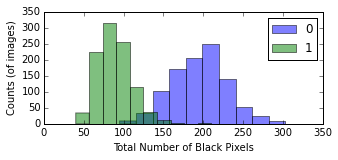

In [4]:
zeros_black = [np.sum(zeros[i, :, :]) for i in range(1000)]
ones_black = [np.sum(ones[i, :, :]) for i in range(1000)]
fig, ax = plt.subplots(figsize=(5, 2));
ax.hist(zeros_black, alpha = 0.5), ax.hist(ones_black, alpha = 0.5)
plt.legend(['0', '1']); plt.xlabel('Total Number of Black Pixels')
plt.ylabel('Counts (of images)');

Although the histograms for the 0's and the 1's are much more skewed towards opposite ends of the total number of center black pixels, there is considerable overlap between the two histograms. For example, there are over 300 0's with 6-16 black center pixels and almost all of the 1's are in that same range. Thus, even though the means of the distributions seem to be more spread out than when we looked at just the total # of black pixels in section 2.1, the error rate is higher.

### 2.2 Black Pixels in Center
We will now try to use a more refined feature, which was that the number of black pixels in the center of the image is much higher for 1's than for 0's (since 0 is shaped like a donut). Since the images are 28x28, the approximate region of the "middle" of the image will be around the 12-16th rows and the 12-16th columns. We will now try calling the same `np.sum()` function on the centers of all 1000 of the images and see if we can discriminate between the 0's and the 1's better.

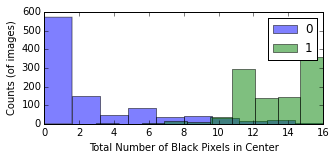

In [5]:
zeros_black = [np.sum(zeros[i, 12:16, 12:16]) for i in range(1000)]
ones_black = [np.sum(ones[i, 12:16, 12:16]) for i in range(1000)]
fig, ax = plt.subplots(figsize=(5, 2));
ax.hist(zeros_black, alpha = 0.5), ax.hist(ones_black, alpha = 0.5)
plt.legend(['0', '1']); plt.xlabel('Total Number of Black Pixels in Center')
plt.ylabel('Counts (of images)');

### 2.3 Width of the Middle
Another feature that seemed to discriminate the 0's from the 1's was the width in the middle of the handwritten number. This is because a '1' is merely a straight vertical line whereas a '0' is elliptical or circular. 

In order to plot the histograms of the widths of the 0's and 1's, we first need to write a function to determine the width in the middle of each given image. Remember that each image contains only 0 and 1 pixel values. Thus, we will take advantage of a numpy function called `np.nonzero()`. This function returns all the index (pixel) positions of an array or matrix that are **nonzero**, meaning all the pixels that are black! Therefore, to get the width at the middle of a 0 or a 1, we simply need to take the maximum pixel position that is nonzero and subtract the minimum pixel position that is nonzero for all the pixels in the middle row of the 28x28 image (you can choose whether to pick the 14th or the 15th row). The code to do so is shown below:

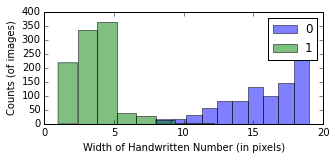

In [6]:
def width(image):
    return np.max(np.nonzero(image)) - np.min(np.nonzero(image))

width0 = [width(zeros[i, 14, :]) for i in range(1000)]
width1 = [width(ones[i, 14, :]) for i in range(1000)]
fig, ax = plt.subplots(figsize=(5, 2));
ax.hist(width0, alpha = 0.5), ax.hist(width1, alpha = 0.5)
plt.legend(['0', '1']); plt.xlabel('Width of Handwritten Number (in pixels)')
plt.ylabel('Counts (of images)');

In [7]:
width(zeros[i, 14, :])

19

### 2.4 Black Pixels in Middle Right
We discussed earlier that it appears to be the case that most of the handwritten 1's do not have any black pixels in the area `[10:15, 20:]` (the middle right of each image), whereas most of the handwritten 0's do! Let's repeat our center black pixel analysis for the pixels here to see if this area of pixels is a more discriminating feature than the center pixels.

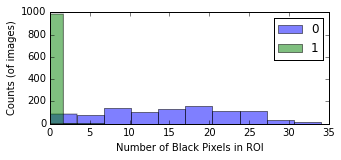

In [8]:
zavg = [np.sum(zeros[i, 14:21, 20:]) for i in range(1000)]
oavg = [np.sum(ones[i, 14:21, 20:]) for i in range(1000)]
fig, ax = plt.subplots(figsize=(5, 2))
ax.hist(zavg, alpha = 0.5), ax.hist(oavg, alpha = 0.5)
plt.legend(['0', '1']); plt.xlabel('Number of Black Pixels in ROI')
plt.ylabel('Counts (of images)');

We see from the histogram that this feature is really promising! Around 95% of the 1's do not have any black pixels in this region of the image, and very few 0's have black pixels in this area. The danger of using this feature, however, is that it is highly depending on this particular set of images that we're analyzing, whereas something like the total number of black pixels or the width of the numbers is less dependent on this exact set of image data.

### 2.5 Rotational Symmetry
One last feature that seemed promising was the fact that 0's have 90 degree rotationaly symmetry, whereas 1's do not. Therefore, if we look at the intersection of the original image and the 90 degree rotated image, there should be much more overlap for 0's than for 1's. Let's check this quickly with a sample 0 and a sample 1. 

We can use the numpy function `np.rot90()` to rotate a 2-dimensional matrix counter-clockwise by 90 degrees. Also, the multiplication operation `*` for numpy matrices is **elementwise** multiplication, meaning each position in the matrix is multiplied by the same position in another matrix as opposed to standard matrix multiplication you may have encountered in linear algebra.

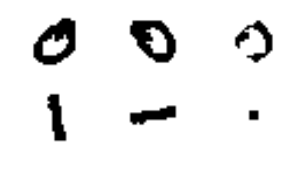

In [9]:
plt.figure(figsize=(5, 2.5))
plt.set_cmap(matplotlib.cm.Greys)
plt.subplot(2, 3, 1), plt.imshow(zeros[1, :, :]), plt.axis('off')
plt.subplot(2, 3, 2), plt.imshow(np.rot90(zeros[1, :, :])), plt.axis('off')
plt.subplot(2, 3, 3), plt.imshow(zeros[1, :, :]*np.rot90(zeros[1, :, :])), plt.axis('off')
plt.subplot(2, 3, 4), plt.imshow(ones[1, :, :]), plt.axis('off')
plt.subplot(2, 3, 5), plt.imshow(np.rot90(ones[1, :, :])), plt.axis('off')
plt.subplot(2, 3, 6), plt.imshow(ones[1, :, :]*np.rot90(ones[1, :, :])), plt.axis('off');

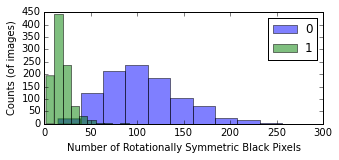

In [10]:
overlap0 = [np.sum(zeros[i, :, :]*np.rot90(zeros[i, :, :])) for i in range(1000)]
overlap1 = [np.sum(ones[i, :, :]*np.rot90(ones[i, :, :])) for i in range(1000)]
fig, ax = plt.subplots(figsize=(5, 2))
ax.hist(overlap0, alpha = 0.5), ax.hist(overlap1, alpha = 0.5)
plt.legend(['0', '1']); plt.xlabel('Number of Rotationally Symmetric Black Pixels')
plt.ylabel('Counts (of images)');

In [11]:
training_data = np.append(zeros, ones, axis = 0)

In [12]:
overlap = np.array([np.sum(img*np.rot90(img)) for img in training_data])
widths = np.array([width(img[14,:]) for img in training_data])
sumPixels = np.array([np.sum(img) for img in training_data])
center = np.array([np.sum(img[12:16, 12:16]) for img in training_data])

In [13]:
labels = [0]*1000
labels.extend([1]*1000)
labels = np.array(labels)

In [14]:
X = np.stack([overlap, widths, sumPixels, center]).T

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_model = LogisticRegression()
logistic_model.fit(X, labels)
predictions = logistic_model.predict(X)

In [16]:
print metrics.accuracy_score(labels, predictions)

0.995


## 3. Computer Vision and Beyond
These are very basic/"old school" descriptors in building a "vocabulary" of how to understand images. More advanced "by-hand" descriptors include Histogram of Gradients, Local Binary Patterns, etc... In analyzing more complex datasets that are much more unstructured than "0s" and "1s", these "by-hand" descriptors are not sufficient, especially in biomedical tasks. In the next section, we'll be going into Convolutional Neural Networks, a powerful tool that can abstract these features for us.

# Convolutional Neural Networks

Important dependencies.

In [5]:
%matplotlib inline
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
import coremltools

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras import backend as K

## 1. Revisting MNIST

In [18]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [19]:
y_train.shape

(60000, 10)

In [20]:
def symbol_MLP(shape, classes=2):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))
    return model

MLP_Mnist = symbol_MLP(shape=(28,28, 1), classes=2)
MLP_Mnist.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [21]:
X = np.expand_dims(training_data, axis=-1)
Y = keras.utils.to_categorical(labels, 2)

print X.shape, Y.shape

(2000, 28, 28, 1) (2000, 2)


In [22]:
MLP_Mnist.fit(X, Y,
          batch_size=16,
          epochs=1,
          verbose=1,
          validation_data=(X, Y))

Train on 2000 samples, validate on 2000 samples
Epoch 1/1
2000/2000 [==============================] - 16s - loss: 0.0436 - acc: 0.9850 - val_loss: 0.0063 - val_acc: 0.9980


## 2. More Complicated Datasets: Sentiment Analysis in Faces

In [6]:
data = pd.read_csv('fer2013.csv')

In [7]:
EMOTIONS = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
SIZE_FACE = 48

In [8]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
def emotion_to_vec(x):
    vec = np.zeros(len(EMOTIONS))
    vec[x] = 1.0
    return vec

def data_to_image(data):
    #print data
    data_image = np.fromstring(str(data), dtype = np.uint8, sep = ' ').reshape((SIZE_FACE, SIZE_FACE))
    data_image = Image.fromarray(data_image).convert('RGB')
    data_image = np.array(data_image)[:, :, ::-1].copy() 
    return data_image

In [10]:
labels, images = [], []
total = data.shape[0]
for index, row in data.iterrows():
    if index > 1000:
        break
    labels.append(emotion_to_vec(row['emotion']))
    images.append(data_to_image(row['pixels']))
    
labels = np.array(labels)
images = np.stack(images)

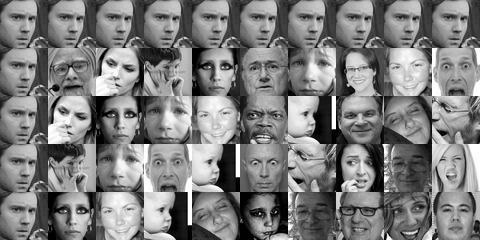

In [11]:
Image.fromarray(np.vstack([np.hstack([images[i*j,:,:,:] for i in range(10)]) for j in range(5)]))

In [ ]:
def symbol_MLP(shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))
    return model

MLP = symbol_MLP(shape=(48,48,3))
MLP.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

MLP.fit(images, labels,
          batch_size=16,
          epochs=2,
          verbose=1,
          validation_data=(images, labels))

Train on 1001 samples, validate on 1001 samples
Epoch 1/2
1001/1001 [==============================] - 28s - loss: 13.4469 - acc: 0.1588 - val_loss: 13.6545 - val_acc: 0.1528
Epoch 2/2
 208/1001 [=====>........................] - ETA: 21s - loss: 13.1734 - acc: 0.1827

In [ ]:
MLP.save('emotion.h5')
labels = 'list.txt'

coreml_model = coremltools.converters.keras.convert(
    'emotion.h5', 
    input_names='data',
    image_input_names = 'data',
    class_labels='labels.txt', 
)

coreml_model.save('EmotionNet.mlmodel')

In [ ]:
def symbol_VGG19(shape):
    model = Sequential()

    model.add(ZeroPadding2D((1, 1), input_shape=shape))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv3_3'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv3_4'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', name='conv4_3'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', name='conv4_4'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', name='conv5_3'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', name='conv5_4'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu', name='dense_1'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu', name='dense_2'))
    model.add(Dropout(0.5))
    model.add(Dense(7, name='dense_3', activation='softmax'))

    return model

VGG19 = symbol_VGG19(shape=(48,48,3))
VGG19.compile(loss=keras.losses.categorical_crossentropy,
          optimizer=keras.optimizers.Adadelta(),
          metrics=['accuracy'])

VGG19.fit(images, labels,
      batch_size=16,
      epochs=2,
      verbose=1,
      validation_data=(images, labels))